# 工作流程
* 載入需要的套件
* 從COCO的驗證資料集中找一張範例照片，並且網上下載，顯示照片
* 進行物件偵測，做方框標記
* 列出偵測出來的類別代碼，以及方框座標
* 列出代碼對應的物件
* 顯示辨識出來的圖形
* 展示骨骼標記
* 展示全景分割

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1           #電腦使用打一種python套件管理程式,如果不知道哪這是什麼,假定pip
                                                                        # 需要安裝python以及pycocotools
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())    #可以得知python的版本 ,cuda將torch搬到CPU來運算
                                                                       #來檢查我們可不可以使用cuda來運算
!gcc --version                                                  #這個步驟按下去之後右上方可以看到RAM,記憶空間
# opencv is pre-installed on colab                       ＃gcc是開放原始碼

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")                                                         
                                                             #assert通常用來對程式碼必要檢查
                                                             #按確定之後要按下面長方形
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 4.9MB/s 
     |████████████████████████████████| 2.2MB 6.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201020-cp36-none-any.whl size=44210 sha256=4347be1f58246665e4edcdfc2be3d9f2200485634532e2079b8f74e6d86fa636
  Stored in directory: /root/.cache/pip/wheels/71/6c/b5/198f89a5c5f127327730248cc623e5a307ad11ed287c3fe391
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import detectron2                                                 #是FAIR的下一代目標檢測和分割研究
import cv2                                                           #opencv
from detectron2 import model_zoo                         
from detectron2.engine import DefaultPredictor      #DefaultPredictor   預測模型
from detectron2.config import get_cfg                   #cfg取得
from detectron2.utils.visualizer import Visualizer     #預測資料讀入
from detectron2.data import MetadataCatalog       #含有資料集的元資料 例如coco類別
from matplotlib import pyplot as plt                      #matplotlib 是強大的python繪圖工具
                                                                       #若一張圖使用全域pyplot很方便

--2020-10-27 05:24:01--  https://cdn.clm02.com/ezvivi.com/184107/ca26665e324285b6aa8bf668f5c3d56c.jpg
Resolving cdn.clm02.com (cdn.clm02.com)... 104.28.3.173, 104.28.2.173, 172.67.182.92
Connecting to cdn.clm02.com (cdn.clm02.com)|104.28.3.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52572 (51K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  51.34K  --.-KB/s    in 0.006s  

2020-10-27 05:24:01 (7.79 MB/s) - ‘input.jpg’ saved [52572/52572]



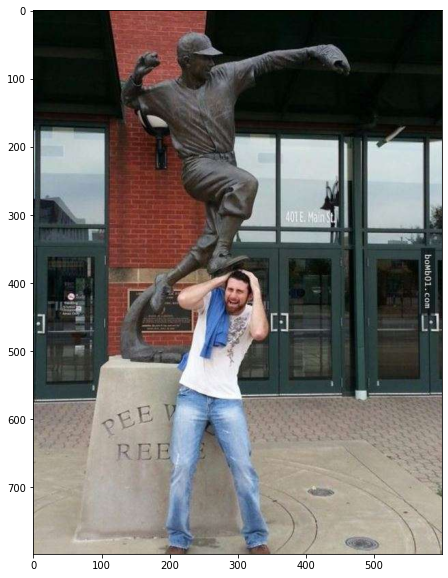

In [ ]:
!wget https://cdn.clm02.com/ezvivi.com/184107/ca26665e324285b6aa8bf668f5c3d56c.jpg -O input.jpg
#!wget http://images.cocodataset.org/val2017/000000398742.jpg -O input.jpg
im = cv2.imread("./input.jpg")                   #以cv2.imread讀進來的一般圖片檔
plt.figure(figsize=(20,10))                         #指定大小
plt.imshow(im[:,:,::-1])                             #im[:,:,::-1]表示將BGR順序變成RGB

# 程式流程
* 宣告設定檔物件
* 取得設定檔，指定需要的模型種類
* 設定辨識值的門檻
* 下載模型
* 宣告偵測器，並且進行偵測
* 展示類別代碼及標記值
* 利用內建Visualizer將偵測出的圖形顯示出來

In [ ]:
# Inference with a object detection model
cfg = get_cfg()                                          #要建立模型的名稱
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model       加載模型需要的數據
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# If your detectron2's version is not the most updated, please use direct link as followed, to get the link , please visit 
# https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

# cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"

predictor = DefaultPredictor(cfg)             #利用這些推斷加載影像進行分析得到結果
outputs = predictor(im)                           #控制台輸出一些結果


model_final_280758.pkl: 167MB [00:04, 37.1MB/s]                           
/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


In [ ]:
print(outputs["instances"].pred_classes)                #instances實例
print(outputs["instances"].pred_boxes)

tensor([0, 0], device='cuda:0')
Boxes(tensor([[122.6248,  30.3020, 458.9589, 487.6117],
        [185.9479, 377.7631, 350.8137, 796.9750]], device='cuda:0'))


In [ ]:
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
preds

['person', 'person']

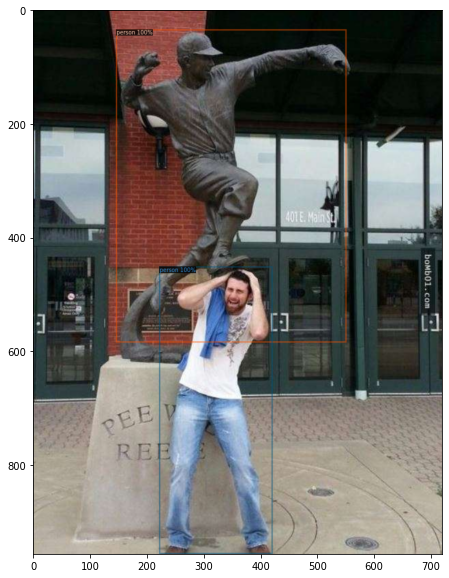

In [ ]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_f10217.pkl: 178MB [00:01, 94.6MB/s]                           


['person', 'person']


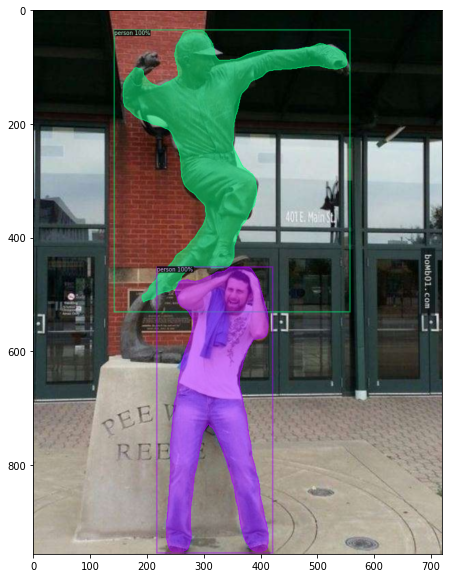

In [ ]:
cfg = get_cfg()                                           #InstanceSegmentation實例分割模型
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = './model_final_f10217.pkl'
predictor = DefaultPredictor(cfg)
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
print(preds)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())                

model_final_a6e10b.pkl: 237MB [00:04, 52.6MB/s]                           


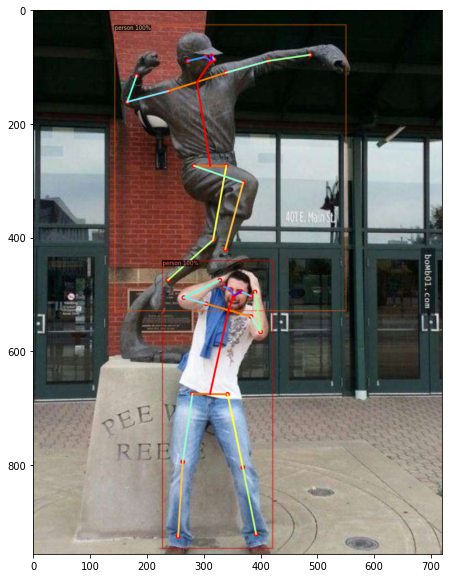

In [ ]:
# Inference with a keypoint detection model         #keypoint用關鍵點推斷
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_cafdb1.pkl: 261MB [00:04, 54.5MB/s]                           


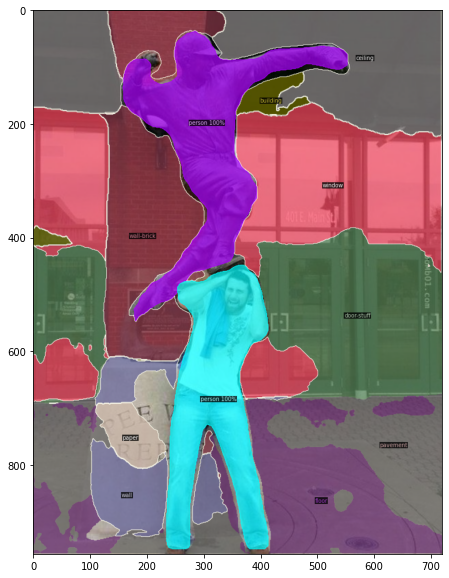

In [ ]:
# Inference with a panoptic segmentation model      #panoptic segmentation model用全景分割模型
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())